Demonstrating the efficacy of Bartlett's Method and Welch's Method

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from numpy.fft import fft

# Periodogram

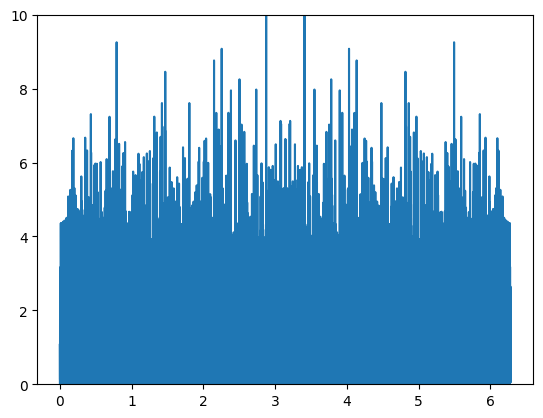

In [12]:
nSamples = 50000
x = random.randn(nSamples)

# DTFT
X = fft(x)
X_periodogram = ((np.abs(X))**2)/nSamples

w = 2*np.pi / nSamples * np.arange(nSamples)

plt.plot(w,X_periodogram)
plt.ylim(0,10)
plt.show()

Notice that even though we would expect a clean, flat line for white noise, it is noisy. This is mitigated by more samples, but still not ideal.

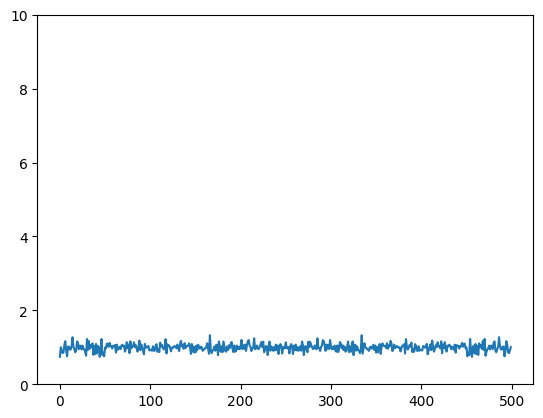

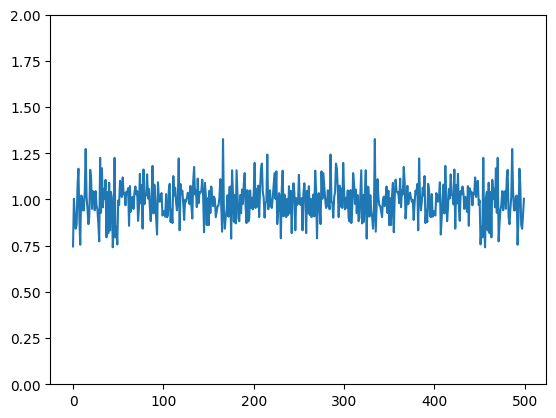

In [13]:
bins = 100
bin_size = int(nSamples/bins)

X1 = np.zeros(bin_size) # will store the sum of the individual periodogram's, to be averaged
m = 0
for k in range(bins):
    s = x[m:m+bin_size]
    Xs = fft(s)
    Xs_periodogram = (np.abs(Xs)**2) / bin_size
    X1 += Xs_periodogram
    
    m += bin_size

X1 /= bins

plt.plot(X1)
plt.ylim(0,10)
plt.show()

plt.plot(X1)
plt.ylim(0,2)
plt.show()

The PSD estimate is significantly closer to our expected flat line using this method.

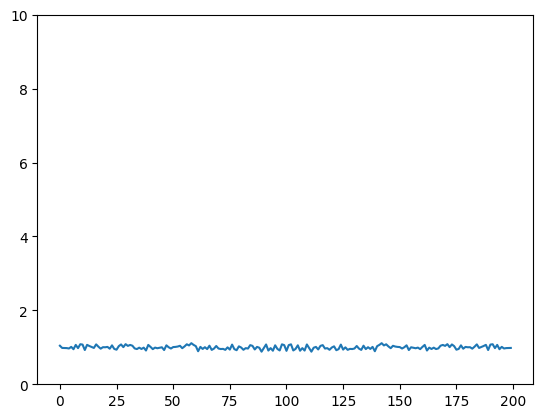

In [9]:
bin_size = 200
m_inc = int(bin_size*0.8)
bins = int(nSamples / m_inc)

X1 = np.zeros(bin_size) # will store the sum of the individual periodogram's, to be averaged
m = 0
for k in range(bins):
    s = x[m:m+bin_size]
    Xs = fft(s)
    Xs_periodogram = (np.abs(Xs)**2) / bin_size
    X1 += Xs_periodogram
    
    m += int(bin_size*0.8) # allow segment overlap!

X1 /= bins

plt.plot(X1)
plt.ylim(0,10)
plt.show()